In [1]:
import pandas as pd 
import geopandas as gpd 
import numpy as np

In [2]:
cicloestaciones = gpd.read_file("./datos/ecobici/cicloestaciones_ecobici/cicloestaciones_ecobici.shp")
cicloestaciones.num_cicloe =cicloestaciones.num_cicloe.apply(lambda x :x.zfill(3).replace(" - ","-"))

<AxesSubplot:>

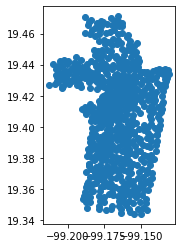

In [3]:
cicloestaciones.plot()

In [14]:
hora_cero = pd.to_datetime("2024-04-01 00:00:00")
viajes_01_23 = pd.read_csv("./datos/ecobici/datos_abiertos_2024_04.csv")
viajes_01_23 = viajes_01_23.rename({"Genero_Usuario":"gen","Edad_Usuario":"edad","Ciclo_Estacion_Retiro":"r_e","Ciclo_EstacionArribo":"a_e"},axis=1)

viajes_01_23["r_f"] = viajes_01_23.apply(lambda x : x.Fecha_Retiro + " " + x.Hora_Retiro,axis=1 )
viajes_01_23["a_f"] = viajes_01_23.apply(lambda x : x["Fecha_Arribo"] + " " + x.Hora_Arribo,axis=1 )

viajes_01_23 =viajes_01_23.drop(["Bici","Fecha_Retiro","Hora_Retiro","Fecha_Arribo","Hora_Arribo"],axis=1)

dict_ciclo = cicloestaciones.set_index("num_cicloe")[["latitud","longitud"]].to_dict("index")

viajes_01_23["r_lat"] = viajes_01_23.r_e.apply(lambda x : dict_ciclo[x]["latitud"] if x in dict_ciclo.keys() else np.nan )
viajes_01_23["r_lon"] = viajes_01_23.r_e.apply(lambda x : dict_ciclo[x]["longitud"] if x in dict_ciclo.keys() else np.nan )

viajes_01_23["a_lat"] = viajes_01_23.a_e.apply(lambda x : dict_ciclo[x]["latitud"] if x in dict_ciclo.keys() else np.nan )
viajes_01_23["a_lon"] = viajes_01_23.a_e.apply(lambda x : dict_ciclo[x]["longitud"] if x in dict_ciclo.keys() else np.nan )


viajes_01_23.drop(list(dict.fromkeys(np.concatenate((viajes_01_23[viajes_01_23.a_lon.isna()].index,viajes_01_23[viajes_01_23.a_lat.isna()].index)))))


viajes_01_23.r_f = pd.to_datetime(viajes_01_23.r_f,format='%d/%m/%Y %H:%M:%S')
viajes_01_23.a_f = pd.to_datetime(viajes_01_23.a_f,format='%d/%m/%Y %H:%M:%S')

viajes_01_23 = viajes_01_23[viajes_01_23.r_f>= hora_cero]

viajes_01_23.r_f =viajes_01_23.r_f.apply(lambda x : (x-hora_cero).total_seconds()).apply(int)
viajes_01_23.a_f =viajes_01_23.a_f.apply(lambda x : (x-hora_cero).total_seconds()).apply(int)

In [24]:
r_e

NameError: name 'r_e' is not defined

In [12]:
viajes_01_23.r_e.value_counts().reset_index().rename({"index":"estación","r_e":"Número de viajes"},axis=1)

,estación,Número de viajes
0,271-272,18904
1,027,11063
2,064,9627
3,028,8612
4,208,8299
...,...,...
649,522,299
650,693,287
651,662,206
652,526,149


In [31]:
viajes_01_23

,gen,edad,r_e,a_e,r_f,a_f,r_lat,r_lon,a_lat,a_lon
26,M,35.0,107-108,119,101,288,19.427329,-99.149971,19.426785,-99.155535
34,M,55.0,165,277,229,334,19.404268,-99.160503,19.401807,-99.159090
35,F,37.0,563,561,155,348,19.419444,-99.149776,19.423673,-99.147957
41,M,39.0,107-108,102,68,399,19.427329,-99.149971,19.428214,-99.139494
48,M,30.0,593,592,276,469,19.400943,-99.147989,19.399664,-99.145136
...,...,...,...,...,...,...,...,...,...,...
1961628,M,32.0,053,053,2587917,2591984,19.414823,-99.178353,19.414823,-99.178353
1961629,M,20.0,362,688,2590070,2591985,19.382109,-99.181056,19.346975,-99.178791
1961630,M,21.0,180,068,2591684,2591992,19.404554,-99.169953,19.411771,-99.173783
1961631,M,29.0,029,055,2591609,2591995,19.434944,-99.150295,19.434514,-99.138068


In [21]:
ciclo = cicloestaciones.set_index("num_cicloe")

In [23]:
a.Ciclo_Estacion_Retiro.value_counts()

304    1
104    1
488    1
152    1
003    1
Name: Ciclo_Estacion_Retiro, dtype: int64

In [29]:
viajes_01_23[viajes_01_23.r_e.apply(lambda x :x not in ciclo.index)]

,gen,edad,r_e,a_e,r_f,a_f,r_lat,r_lon,a_lat,a_lon
944206,M,41.0,1002,1002,1273309,1274212,NaN,NaN,NaN,NaN


In [30]:
viajes_01_23[viajes_01_23.a_e.apply(lambda x :x not in ciclo.index)]

,gen,edad,r_e,a_e,r_f,a_f,r_lat,r_lon,a_lat,a_lon
65363,M,31.0,038,1000,57428,103666,19.420843,-99.171373,NaN,NaN
98664,F,30.0,273-274,1000,114173,140731,19.442707,-99.152956,NaN,NaN
509775,M,39.0,117,1000,655747,720991,19.427132,-99.160369,NaN,NaN
577204,M,21.0,555,1000,760346,793685,19.440216,-99.156168,NaN,NaN
683586,O,35.0,565,1000,902134,911626,19.417688,-99.152700,NaN,NaN
691813,M,43.0,139,1000,897049,918384,19.416128,-99.162097,NaN,NaN
754190,F,47.0,485,1000,980730,993271,19.438506,-99.172696,NaN,NaN
798962,M,21.0,126,1000,816477,1024987,19.422288,-99.162138,NaN,NaN
944206,M,41.0,1002,1002,1273309,1274212,NaN,NaN,NaN,NaN
968753,M,44.0,021,1000,1291843,1313554,19.424784,-99.172119,NaN,NaN


In [12]:
viajes_01_23[[ 'a_lat',
       'a_lon']].drop_duplicates()

,a_lat,a_lon
26,19.426785,-99.155535
34,19.401807,-99.159090
35,19.423673,-99.147957
41,19.428214,-99.139494
48,19.399664,-99.145136
...,...,...
12248,19.399172,-99.140625
12574,19.460540,-99.162971
14819,19.466937,-99.162948
65363,NaN,NaN


In [32]:
viajes_01_23

,gen,edad,r_e,a_e,r_f,a_f,r_lat,r_lon,a_lat,a_lon
26,M,35.0,107-108,119,101,288,19.427329,-99.149971,19.426785,-99.155535
34,M,55.0,165,277,229,334,19.404268,-99.160503,19.401807,-99.159090
35,F,37.0,563,561,155,348,19.419444,-99.149776,19.423673,-99.147957
41,M,39.0,107-108,102,68,399,19.427329,-99.149971,19.428214,-99.139494
48,M,30.0,593,592,276,469,19.400943,-99.147989,19.399664,-99.145136
...,...,...,...,...,...,...,...,...,...,...
1961628,M,32.0,053,053,2587917,2591984,19.414823,-99.178353,19.414823,-99.178353
1961629,M,20.0,362,688,2590070,2591985,19.382109,-99.181056,19.346975,-99.178791
1961630,M,21.0,180,068,2591684,2591992,19.404554,-99.169953,19.411771,-99.173783
1961631,M,29.0,029,055,2591609,2591995,19.434944,-99.150295,19.434514,-99.138068


In [7]:
cicloestaciones.to_file("datos_limpios/ecobaby/cicloestaciones.geojson")

In [8]:
viajes_01_23.to_json("datos_limpios/ecobaby/retiro_arribo.json",orient="records")

In [16]:
viajes_01_23.drop(["gen","edad","r_e","a_e"],axis=1).to_csv("datos_limpios/ecobaby/retiro_arribo.csv",index=False)

In [51]:
datavis=viajes_01_23[viajes_01_23.apply(lambda x :x.r_e in ciclo.index and x.a_e in ciclo.index,axis=1)]
datavis.drop(["gen","edad","r_lat","r_lon","a_lat","a_lon"],axis=1).to_csv("datos_limpios/ecobaby/retiro_arribo.csv",index=False, dtype={'Codigo': str})

In [60]:
datavis['r_e'] = datavis['r_e'].astype(str)

datavis['a_e'] = datavis['a_e'].astype(str)

datavis.drop(["gen","edad","r_lat","r_lon","a_lat","a_lon"],axis=1).to_csv("datos_limpios/ecobaby/retiro_arribo.csv",index=False)

/tmp/ipykernel_73927/2583202692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datavis['r_e'] = datavis['r_e'].astype(str)
/tmp/ipykernel_73927/2583202692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datavis['a_e'] = datavis['a_e'].astype(str)


In [58]:
datavis

,gen,edad,r_e,a_e,r_f,a_f,r_lat,r_lon,a_lat,a_lon
26,M,35.0,107-108,119,101,288,19.427329,-99.149971,19.426785,-99.155535
34,M,55.0,165,277,229,334,19.404268,-99.160503,19.401807,-99.159090
35,F,37.0,563,561,155,348,19.419444,-99.149776,19.423673,-99.147957
41,M,39.0,107-108,102,68,399,19.427329,-99.149971,19.428214,-99.139494
48,M,30.0,593,592,276,469,19.400943,-99.147989,19.399664,-99.145136
...,...,...,...,...,...,...,...,...,...,...
1961628,M,32.0,053,053,2587917,2591984,19.414823,-99.178353,19.414823,-99.178353
1961629,M,20.0,362,688,2590070,2591985,19.382109,-99.181056,19.346975,-99.178791
1961630,M,21.0,180,068,2591684,2591992,19.404554,-99.169953,19.411771,-99.173783
1961631,M,29.0,029,055,2591609,2591995,19.434944,-99.150295,19.434514,-99.138068


In [47]:
ciclo[["latitud","longitud"]].T.to_dict(orient="list")

{'001': [19.4335895, -99.1678193],
 '002': [19.43062276, -99.17123066],
 '003': [19.43163, -99.158547],
 '004': [19.428491, -99.171693],
 '005': [19.429804, -99.169451],
 '006': [19.430963, -99.166986],
 '007': [19.425355, -99.17515],
 '008': [19.431256, -99.158153],
 '009': [19.428184, -99.170013],
 '010': [19.433431, -99.155142],
 '011': [19.431192, -99.163546],
 '012': [19.432223, -99.161686],
 '013': [19.424941, -99.17233],
 '014': [19.42454, -99.173247],
 '015': [19.425597, -99.171409],
 '016': [19.4267528, -99.16861944],
 '017': [19.427553, -99.167396],
 '018': [19.428802, -99.164381],
 '019': [19.429453, -99.16283],
 '020': [19.430907, -99.160148],
 '021': [19.424784, -99.172119],
 '022': [19.424784, -99.172119],
 '023': [19.42528, -99.171099],
 '024': [19.426614, -99.168078],
 '025': [19.427338, -99.16672],
 '026': [19.432595, -99.154995],
 '027': [19.42916, -99.162703],
 '028': [19.423664, -99.172568],
 '029': [19.434944, -99.150295],
 '030': [19.426384, -99.164255],
 '031': [

In [50]:
ciclo.longitud.describe()

count    675.000000
mean     -99.167484
std        0.016454
min      -99.212845
25%      -99.178166
50%      -99.167387
75%      -99.156147
max      -99.130918
Name: longitud, dtype: float64